In [32]:
import numpy as np
import pandas  as pd 
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [34]:
ll=LabelEncoder()
df["sex"]=ll.fit_transform(df["sex"])
df["smoker"]=ll.fit_transform(df["smoker"])

In [35]:
x=df[["age","sex","bmi","children","smoker"]]
y=df["charges"]

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [39]:
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()
x_train= ss.fit_transform(x_train)
x_test= ss.transform(x_test)


TRAINING THE MODEL

In [60]:
import pickle
pickle.dump(ss,open('scaling.pkl','wb'))

In [40]:
model = RandomForestRegressor(
    n_estimators=200,   # increase trees
    max_depth=100,     # let it grow deeper
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)


In [41]:
model.fit(x_train,y_train)

RandomForestRegressor(max_depth=100, n_estimators=200, random_state=42)

In [42]:
yp=model.predict(x_test)

In [43]:
model.score(x_test,y_test)

0.8595834213440301

In [44]:
m=mean_squared_error(yp,y_test)
m

np.float64(21799495.716754172)

In [ ]:
model.predict([[24,1,]])

array([48918.9294695])

In [47]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [48]:
r=r2_score(yp,y_test)
r*100

84.90510258383001

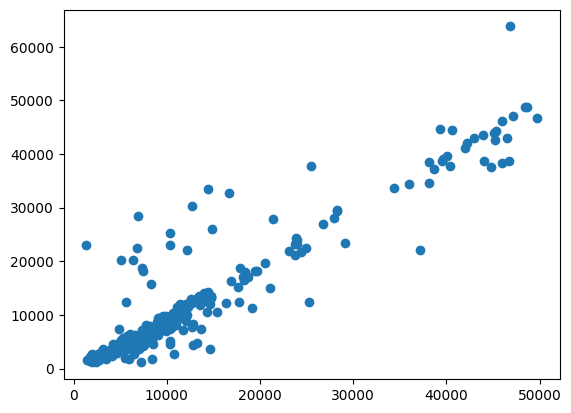

In [49]:
plt.scatter(yp,y_test)

In [50]:
rr=y_test-yp
rr

764     -1985.866339
887        69.272808
890      1109.249606
1293      -39.228888
259      -664.298337
            ...     
109       -97.893265
575      -207.267252
535       326.782934
543     16917.036917
846       -92.816095
Name: charges, Length: 268, dtype: float64

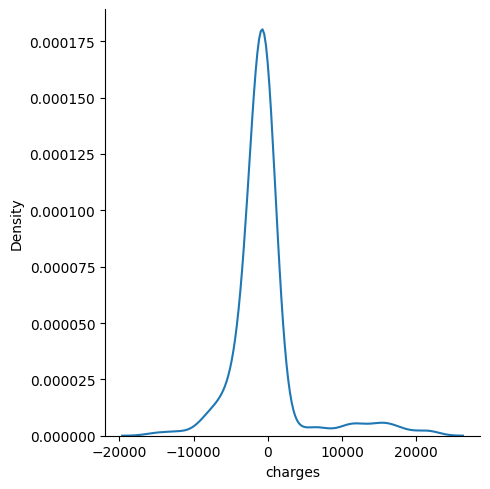

In [51]:
sns.displot(rr,kind="kde")

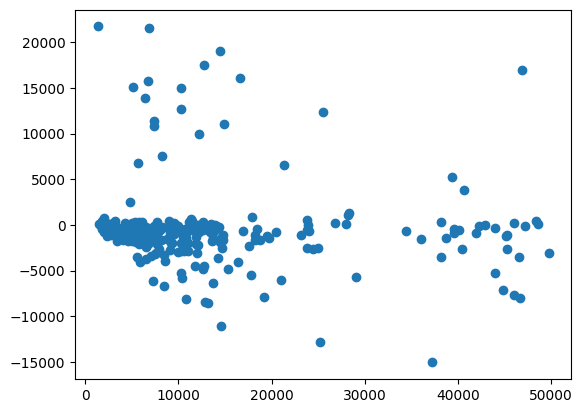

In [52]:
plt.scatter(yp,rr)

NEW PREDICTION DATA

In [55]:
model.predict(ss.transform([[29,1,24,0,0]]))

c:\Users\adull\OneDrive\Desktop\insuranceproject\insurance\myvenv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([3303.43842585])

PICKLING THE MODEL FILE FOR DEPLOYMENT 

In [56]:
import pickle

In [57]:
pickle.dump(model,open("formodel.pkl","wb"))

In [58]:
pickled_model=pickle.load(open("formodel.pkl","rb"))

In [59]:
pickled_model.predict(ss.transform([[34,1,24,0,1]]))

c:\Users\adull\OneDrive\Desktop\insuranceproject\insurance\myvenv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([17624.30034305])